In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.metrics import Accuracy, Recall, Precision, AUC, TruePositives, TrueNegatives, FalseNegatives, FalsePositives
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf # Imports tensorflow


# from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, LSTM,Bidirectional,Attention,Concatenate
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, Bidirectional,Attention,Concatenate

from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Accuracy,Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
#import imblearn
#from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import skimage.io
import skimage.color
import skimage.filters

In [2]:
images=[]
masks=[]
y=[]
gr_shape=(128,128,1)
img_shape = (128,128,3)
input_dir="LIDC-IDRI-slices"
out_dir = "lidc_kaggle/output"

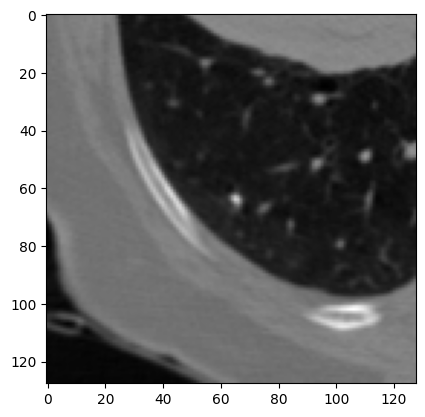

In [3]:
img=image.load_img('LIDC-IDRI-slices/LIDC-IDRI-0004/nodule-0/images/slice-1.png')
plt.imshow(img)
plt.show()

In [4]:
np.asarray(img).shape

(128, 128, 3)

In [5]:
images=[]

y=[]
for nodule in os.listdir('LIDC-IDRI-slices/LIDC-IDRI-0001'):
        mask0=[]
        mask1=[]
        mask2=[]
        mask3=[]
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/images/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            images.append(img)
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-0/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask0.append(img)
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-1/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask1.append(img)
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-2/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask2.append(img)
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-3/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask3.append(img)


LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-0.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-1.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-2.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-3.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-4.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-5.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-6.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-7.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-8.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-0.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-1.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-2.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-3.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-4.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-5.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-6.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0

In [6]:
Thres = 100000

In [7]:
gmask=[]
for i in range(len(mask0)):
    white_sum=np.array([mask0[i].sum(),mask1[i].sum(),mask2[i].sum(),mask3[i].sum()])
    cnt=int(mask0[i].sum()>Thres)+int(mask1[i].sum()>Thres)+int(mask2[i].sum()>Thres)+int(mask3[i].sum()>Thres)
    print(cnt)
    if(cnt>2):
        print("ID ="+str(white_sum.argmax()))
        print(white_sum)

3
ID =0
[289935      0 102510 237915]
4
ID =0
[577575 398565 457470 509490]
4
ID =0
[648720 572985 561510 562275]
4
ID =0
[710685 688500 684675 681615]
4
ID =0
[694620 639540 635715 672435]
4
ID =0
[614295 563805 574515 596700]
4
ID =0
[515610 435285 481185 510255]
4
ID =0
[465885 230265 292995 364905]
0


In [8]:
gr_shape=(128,128,1)
img_shape = (128,128,3)
input_dir="LIDC-IDRI-slices"
images=[]
masks=[]
y=[]
y_test = []
y_pred = []
Thres = 1000

In [9]:
for patient in os.listdir(input_dir):
    for nodule in os.listdir(input_dir+'/'+patient):
        mask0=[]
        mask1=[]
        mask2=[]
        mask3=[]
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/images/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            images.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-0/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask0.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-1/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask1.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-2/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask2.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-3/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask3.append(img)
        for i in range(len(mask0)):
            white_sum=np.array([mask0[i].sum(),mask1[i].sum(),mask2[i].sum(),mask3[i].sum()])
            cnt=int(mask0[i].sum()>Thres)+int(mask1[i].sum()>Thres)+int(mask2[i].sum()>Thres)+int(mask3[i].sum()>Thres)
            if(cnt>2):
                y.append(1)
                if white_sum.argmax()==0:
                    masks.append(mask0[i])
                elif white_sum.argmax()==1:
                    masks.append(mask1[i])
                elif white_sum.argmax()==2:
                    masks.append(mask2[i])
                else:
                    masks.append(mask3[i])
            else:
                y.append(0)
                if white_sum.argmin()==0:
                    masks.append(mask0[i])
                elif white_sum.argmin()==1:
                    masks.append(mask1[i])
                elif white_sum.argmin()==2:
                    masks.append(mask2[i])
                else:
                    masks.append(mask3[i])


In [10]:
images = images[0:2500]
masks= masks[0:2500]
y= y[0:2500]

In [11]:
images=np.array(images)
masks=np.array(masks)
label=np.array(y)

In [12]:
print(images.shape)
print(masks.shape)
print(label.shape)

(2500, 128, 128, 3)
(2500, 128, 128, 3)
(2500,)


In [13]:
yy=pd.DataFrame(label)
yy.value_counts()

1    1360
0    1140
Name: count, dtype: int64

In [15]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3

def inception_model(img_shape):
    inputs = Input(shape=img_shape)
    base_model = InceptionV3(input_tensor=inputs, weights='inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=outputs)

    # Compile the model with binary_crossentropy for binary classification
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Example usage
img_shape = (224, 224, 3)  # Adapt this to your input image size

inception_model = inception_model(img_shape)
inception_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94[0

In [16]:

x_train, x_test, y_train, y_test = train_test_split(images, label, train_size=0.8, random_state=7)
print(x_train.shape)
print(y_train.shape)

(2000, 128, 128, 3)
(2000,)


In [26]:
import numpy as np
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have x_train, x_test, y_train, and y_test as NumPy arrays
# Make sure your images are already preprocessed and resized to (128, 128, 3)

# Define the image size and batch size
image_size = (128, 128)
batch_size = 64

# Create ImageDataGenerator for data augmentation and preprocessing
train_data_generator = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Rescale pixel values to [0, 1]
    rotation_range=15,    # Randomly rotate images within the range of 15 degrees
    width_shift_range=0.1, # Randomly shift images horizontally within 10% of the image width
    height_shift_range=0.1, # Randomly shift images vertically within 10% of the image height
    horizontal_flip=True  # Randomly flip images horizontally
)

test_data_generator = ImageDataGenerator(rescale=1.0 / 255.0)

# Create the train data generator
train_generator = train_data_generator.flow(
    x_train, y_train, batch_size=batch_size, shuffle=True
)

# Create the test data generator
test_generator = test_data_generator.flow(
    x_test, y_test, batch_size=batch_size, shuffle=False
)

# Create the ResNet50V2 model
base_model = ResNet50V2(include_top=False, weights=r'resnet50v2_weights_tf_dim_ordering_tf_kernels_notop.h5', input_shape=(128, 128, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 50  # Adjust the number of epochs as needed

history= model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
32/32 [==============================] - 131s 4s/step - loss: 0.8702 - accuracy: 0.5125 - val_loss: 0.6873 - val_accuracy: 0.5320
Epoch 2/50
32/32 [==============================] - 122s 4s/step - loss: 0.7189 - accuracy: 0.5390 - val_loss: 0.6881 - val_accuracy: 0.5300
Epoch 3/50
32/32 [==============================] - 119s 4s/step - loss: 0.7089 - accuracy: 0.5340 - val_loss: 0.6856 - val_accuracy: 0.5300
Epoch 4/50
32/32 [==============================] - 119s 4s/step - loss: 0.6893 - accuracy: 0.5635 - val_loss: 0.6801 - val_accuracy: 0.5400
Epoch 5/50
32/32 [==============================] - 121s 4s/step - loss: 0.6790 - accuracy: 0.5835 - val_loss: 0.6754 - val_accuracy: 0.5980
Epoch 6/50
32/32 [==============================] - 118s 4s/step - loss: 0.6705 - accuracy: 0.6005 - val_loss: 0.6650 - val_accuracy: 0.5720
Epoch 7/50
32/32 [==============================] - 121s 4s/step - loss: 0.6544 - accuracy: 0.6195 - val_loss: 0.6504 - val_accuracy: 0.6240
Epoch 8/50
32

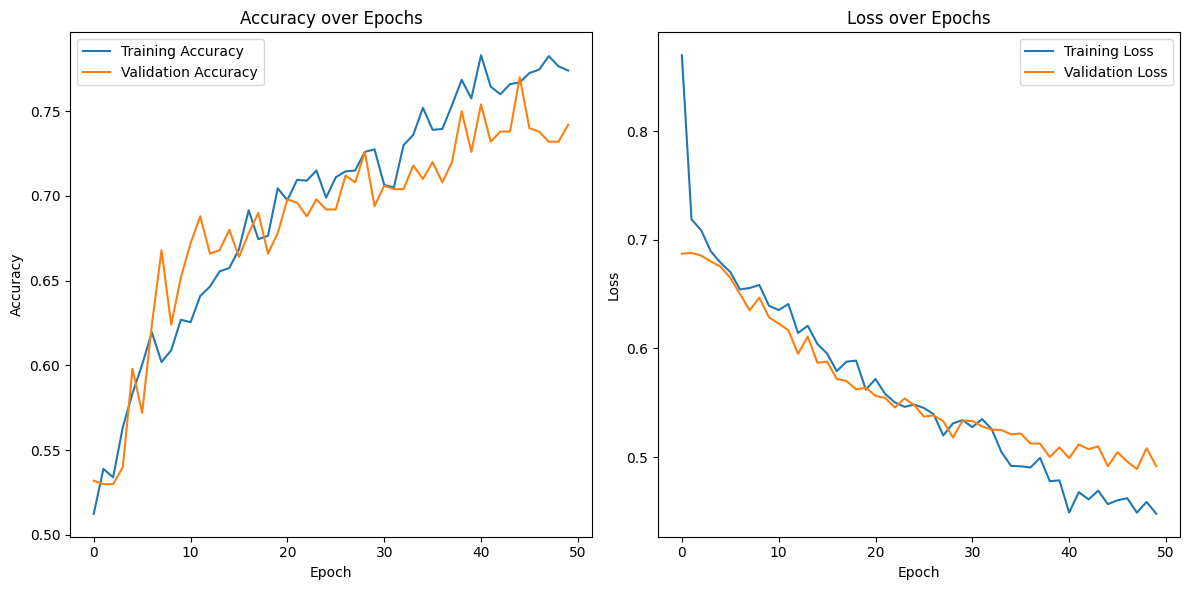

In [27]:
# Plot the accuracy and loss graphs
def plot_accuracy_loss(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the graphs
plot_accuracy_loss(history)

8/8 [==============================] - 14s 2s/step
Confusion Matrix:
[[170  66]
 [ 63 201]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.73      0.72      0.72       236
     Class 1       0.75      0.76      0.76       264

    accuracy                           0.74       500
   macro avg       0.74      0.74      0.74       500
weighted avg       0.74      0.74      0.74       500



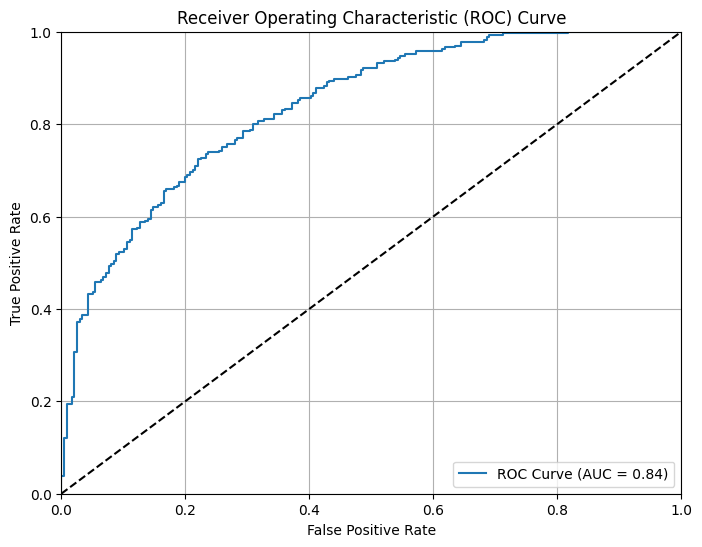

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
# Get predictions on the test data
y_pred_probs = model.predict(test_generator).flatten()
y_pred = np.round(y_pred_probs)  # Convert probabilities to binary predictions (0 or 1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
class_names = ["Class 0", "Class 1"]  # Replace with your actual class names
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(report)

# Generate ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)

# Plot ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# Create the ResNet50V2 model
base_model = ResNet50V2(include_top=False, weights=r'resnet50v2_weights_tf_dim_ordering_tf_kernels_notop.h5', input_shape=(128, 128, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 66, 66, 64)           0         ['conv1_conv[0][0]']          
                                                                                              

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='resnet)model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
